In [3]:
!pip install lime==0.2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e0eb498168303eb9cf6666046cf69d682a3d2a6e610765566cc32af4f0ecb53c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [4]:
import tensorflow as tf
import numpy as np
import PIL.Image
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

from lime import lime_image

%matplotlib inline

In [5]:
print(f'Tensorflow verseion: {tf.__version__}')

Tensorflow verseion: 2.15.0


In [6]:
def LoadImage(file_path, model='VGG'):
    im = PIL.Image.open(file_path)
    if model == 'Inception':
        im = im.resize((299,299))
    else:
        im = im.resize((224,224))
    im = np.asarray(im)
    return im

def PreprocessVGGImage(im):
    im = tf.keras.applications.vgg16.preprocess_input(im)
    return im

def PreprocessInceptionImage(im):
    im = tf.keras.applications.inception_v3.preprocess_input(im)
    return im

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
pip install pillow

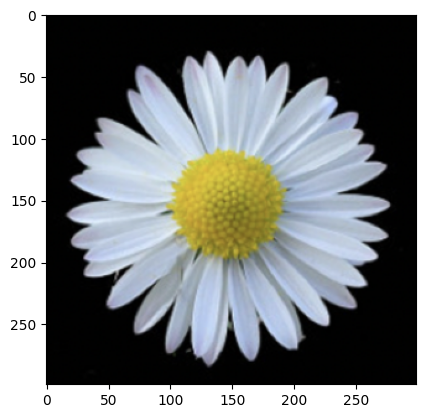

In [17]:
# Load the image
im_orig = LoadImage('/content/drive/MyDrive/LIME Data/flower.png', model='Inception')

from PIL import Image
import numpy as np

def convert_to_rgb(im_orig):
    """
    Convert an image to RGB format.

    Parameters:
    - im_orig: Image object or numpy array

    Returns:
    - Image object in RGB format
    """
    # Check if the input is a numpy array and convert it to a PIL Image
    if isinstance(im_orig, np.ndarray):
        im_orig = Image.fromarray(im_orig)

    # Convert the image to RGB format
    img_rgb = im_orig.convert("RGB")

    return img_rgb
im_orig = convert_to_rgb(im_orig)
im_orig = np.array(im_orig)

plt.imshow(im_orig)
plt.show()

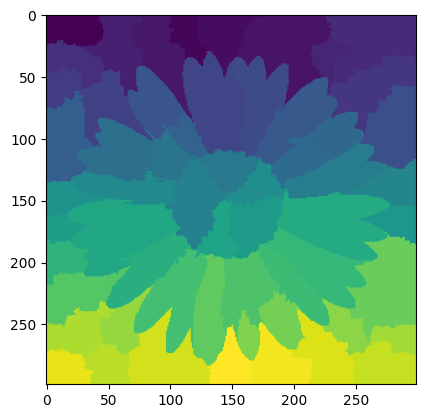

In [18]:
from skimage.segmentation import felzenszwalb, quickshift
from skimage import img_as_ubyte

segments = quickshift(im_orig,
                      kernel_size=4,
                      max_dist=200,
                      ratio=0.2,
                      random_seed=42)

plt.imshow(segments)
plt.show()

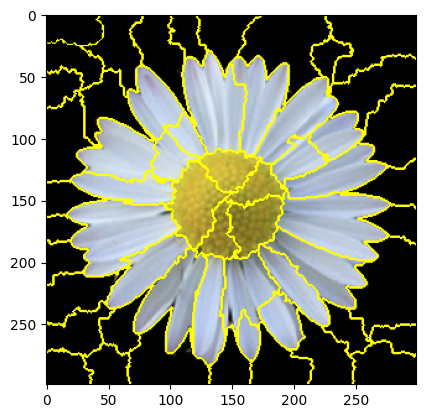

In [19]:
plt.imshow(mark_boundaries(im_orig, segments))
plt.show()

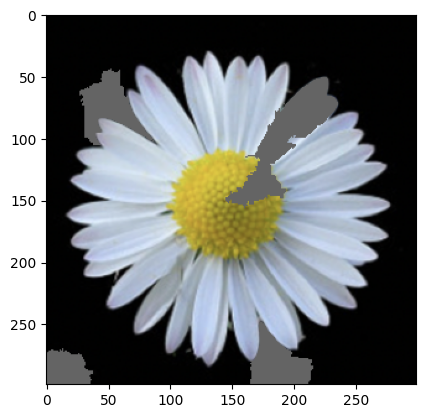

In [20]:
segmented_image = im_orig.copy()

# Isolate a few segments
segmented_image[segments == 11] = 100
segmented_image[segments == 28] = 100
segmented_image[segments == 16] = 100
segmented_image[segments == 55] = 100
segmented_image[segments == 56] = 100
plt.imshow(segmented_image)
plt.show()

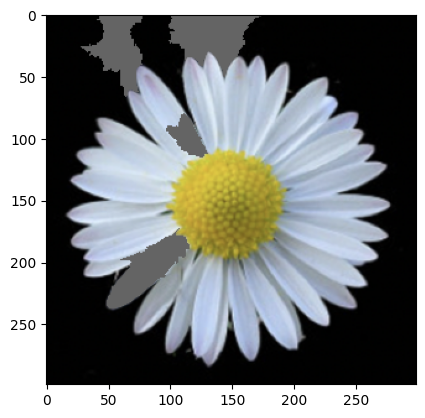

In [21]:
fudged_image = im_orig.copy()
# Isolate a few segments
fudged_image[segments == 1] = 100
fudged_image[segments == 2] = 100
fudged_image[segments == 18] = 100
fudged_image[segments == 5] = 100
fudged_image[segments == 36] = 100
plt.imshow(fudged_image)
plt.show()

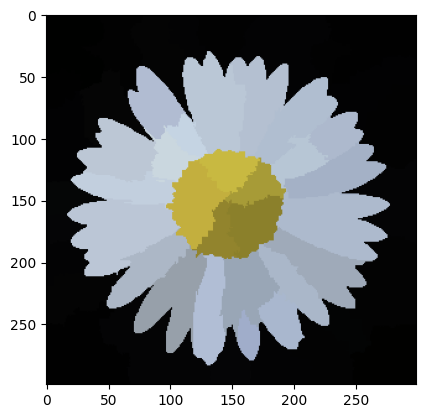

In [22]:
segmented_image = im_orig.copy()
# Replace superpixel with average of the pixel values
for x in np.unique(segments):
    segmented_image[segments == x] = (
        np.mean(im_orig[segments == x][:, 0]),
        np.mean(im_orig[segments == x][:, 1]),
        np.mean(im_orig[segments == x][:, 2]))

plt.imshow(segmented_image)
plt.show()

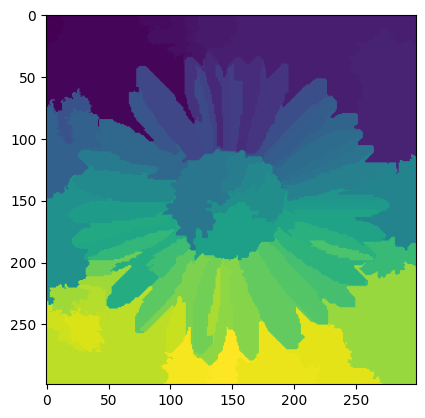

In [23]:
segments = felzenszwalb(im_orig, min_size=200)
plt.imshow(segments)
plt.show()

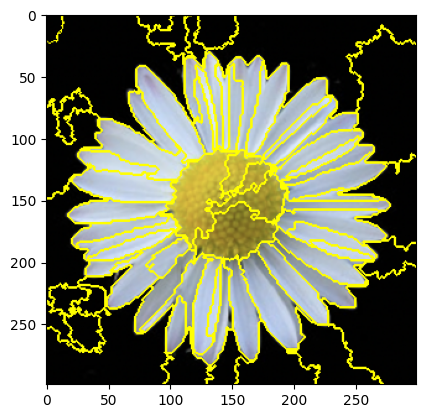

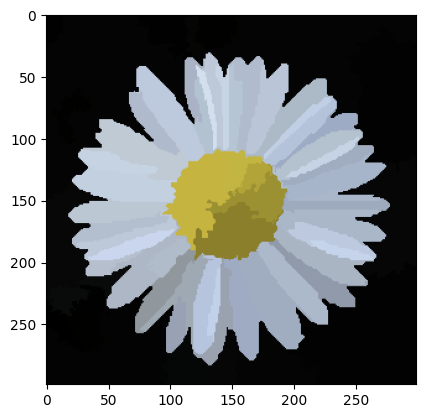

In [24]:
plt.imshow(mark_boundaries(im_orig, segments))
plt.show()
segmented_image = im_orig.copy()
for x in np.unique(segments):
    segmented_image[segments == x] = (
        np.mean(im_orig[segments == x][:, 0]),
        np.mean(im_orig[segments == x][:, 1]),
        np.mean(im_orig[segments == x][:, 2]))
plt.imshow(segmented_image)
plt.show()

In [25]:
inception = tf.keras.applications.InceptionV3(
    include_top=True, weights='imagenet')
model = tf.keras.models.Model(inception.inputs, inception.output)

96112376/96112376 [==============================] - 1s 0us/step


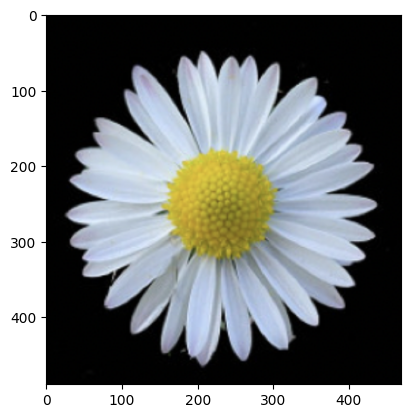

Prediction class: 985
Predicted class label: daisy


In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from PIL import Image
import json

# Placeholder function for LoadImage - replace with your actual implementation
def LoadImage(filepath, model):
    img = Image.open(filepath)
    return np.array(img)

# Placeholder function for PreprocessInceptionImage - replace with your actual implementation
def PreprocessInceptionImage(image):
    image = tf.image.resize(image, (299, 299))
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image

# Load the image
im_orig = LoadImage('/content/drive/MyDrive/LIME Data/flower.png', model='Inception')
if im_orig.shape[2] == 4:
    im_orig = im_orig[:, :, :3]

im_orig = img_as_ubyte(im_orig)
image = PreprocessInceptionImage(im_orig)

plt.imshow(im_orig)
plt.show()

# Load the InceptionV3 model pre-trained on ImageNet
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

# Make predictions
predictions = model(np.array([image]))
prediction_class = np.argmax(predictions[0])

print("Prediction class: " + str(prediction_class))

# Load ImageNet class labels
class_labels_path = tf.keras.utils.get_file(
    'imagenet_class_index.json',
    'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
)

# Decode the class labels
with open(class_labels_path, 'r') as f:
    class_index = json.load(f)

# Find the label corresponding to the prediction class
index = str(prediction_class)
predicted_class_label = class_index[index][1]
print("Predicted class label:", predicted_class_label)


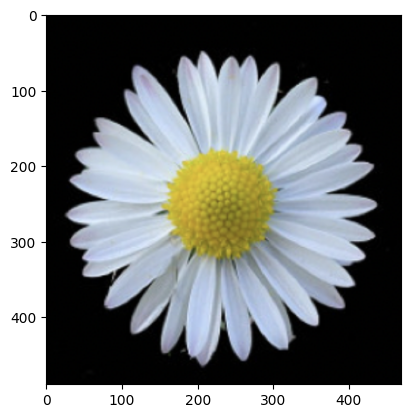

Prediction class: 985
Predicted class label: daisy


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


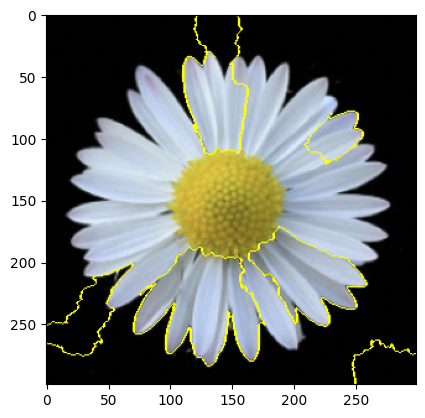

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from PIL import Image
import json
import lime
from lime import lime_image

# Placeholder function for LoadImage - replace with your actual implementation
def LoadImage(filepath, model):
    img = Image.open(filepath)
    return np.array(img)

# Placeholder function for PreprocessInceptionImage - replace with your actual implementation
def PreprocessInceptionImage(image):
    image = tf.image.resize(image, (299, 299))
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image

# Load the image
im_orig = LoadImage('/content/drive/MyDrive/LIME Data/flower.png', model='Inception')
if im_orig.shape[2] == 4:
    im_orig = im_orig[:, :, :3]

im_orig = img_as_ubyte(im_orig)
image = PreprocessInceptionImage(im_orig)

plt.imshow(im_orig)
plt.show()

# Convert the image to a numpy array
image_np = image.numpy()

# Load the InceptionV3 model pre-trained on ImageNet
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

# Make predictions
predictions = model(np.array([image_np]))
prediction_class = np.argmax(predictions[0])

print("Prediction class: " + str(prediction_class))

# Load ImageNet class labels
class_labels_path = tf.keras.utils.get_file(
    'imagenet_class_index.json',
    'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
)

# Decode the class labels
with open(class_labels_path, 'r') as f:
    class_index = json.load(f)

# Find the label corresponding to the prediction class
index = str(prediction_class)
predicted_class_label = class_index[index][1]
print("Predicted class label:", predicted_class_label)

# LIME explanation
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF.
# Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(image=image_np.astype('double'),
                                         classifier_fn=model.predict,
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000)

# Display the explanation
from skimage.segmentation import mark_boundaries

# Get the explanation image for the top label
temp, mask = explanation.get_image_and_mask(prediction_class, positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


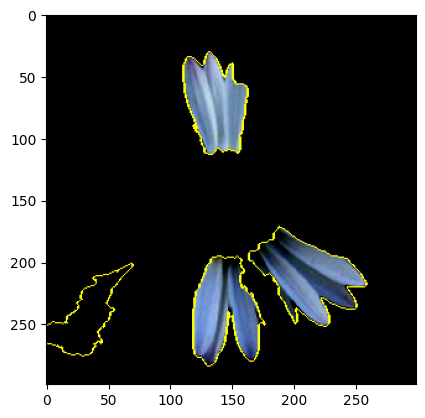

In [39]:
temp, mask = explanation.get_image_and_mask(label=explanation.top_labels[0],
                                            positive_only=True,
                                            num_features=6,
                                            hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

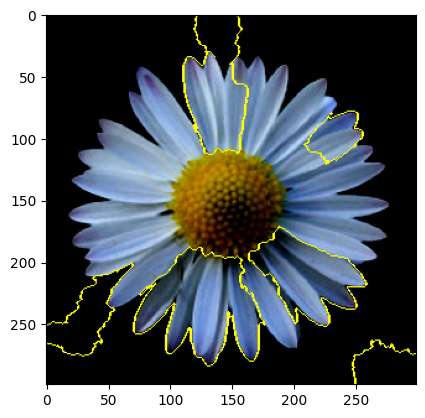

In [42]:
temp, mask = explanation.get_image_and_mask(label=explanation.top_labels[0],
                                            positive_only=True,
                                            num_features=10,
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

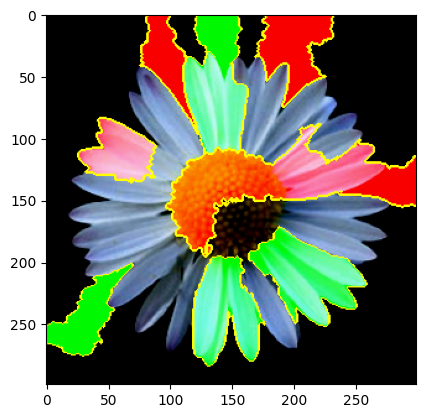

In [43]:
temp, mask = explanation.get_image_and_mask(label=explanation.top_labels[0],
                                            positive_only=False,
                                            num_features=15,
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.show()